# Feature Selection with sklearn and Pandas

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data reading and prep

In [2]:
# wifi counts number of people per day
wifi = pd.read_csv(r"C:\Users\Javiera Vines\Documents\Projects\Feature Selection\wifi_visits.csv")
wifi

,operating_date,visits
0,2018-10-08,336
1,2018-10-09,336
2,2018-10-10,238
3,2018-10-11,328
4,2018-10-12,19
...,...,...
360,2019-10-03,141
361,2019-10-04,112
362,2019-10-05,2
363,2019-10-06,0


In [3]:
#electrical consumption data hourly elevator & hvac (air conditioning)
eec = pd.read_csv(r"C:\Users\Javiera Vines\Documents\Projects\Feature Selection\eec.csv")
eec.head(5)

,local_time,energy_consumed,sensor
0,2018-10-08T00:00:00,203495,elevator-eec-meter
1,2018-10-08T00:00:00,1368750,hvac-eec-meter
2,2018-10-08T01:00:00,210536,elevator-eec-meter
3,2018-10-08T01:00:00,1373077,hvac-eec-meter
4,2018-10-08T02:00:00,188568,elevator-eec-meter


In [4]:
type(eec["local_time"][0]) # currently this variable is a str we will convert it to datetimeformat to extract the date only

str

In [5]:
eec['local_time2']= pd.to_datetime(eec['local_time']) 
eec.head()

,local_time,energy_consumed,sensor,local_time2
0,2018-10-08T00:00:00,203495,elevator-eec-meter,2018-10-08 00:00:00
1,2018-10-08T00:00:00,1368750,hvac-eec-meter,2018-10-08 00:00:00
2,2018-10-08T01:00:00,210536,elevator-eec-meter,2018-10-08 01:00:00
3,2018-10-08T01:00:00,1373077,hvac-eec-meter,2018-10-08 01:00:00
4,2018-10-08T02:00:00,188568,elevator-eec-meter,2018-10-08 02:00:00


In [6]:
type(eec["local_time2"][0]) #check datatype

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
#replace the column local_time with date only
eec['local_time'] = eec['local_time2'].dt.date
eec.head()

,local_time,energy_consumed,sensor,local_time2
0,2018-10-08,203495,elevator-eec-meter,2018-10-08 00:00:00
1,2018-10-08,1368750,hvac-eec-meter,2018-10-08 00:00:00
2,2018-10-08,210536,elevator-eec-meter,2018-10-08 01:00:00
3,2018-10-08,1373077,hvac-eec-meter,2018-10-08 01:00:00
4,2018-10-08,188568,elevator-eec-meter,2018-10-08 02:00:00


In [8]:
type(eec["local_time"][0]) #check datatype

datetime.date

In [9]:
weather = pd.read_csv(r"C:\Users\Javiera Vines\Documents\Projects\Feature Selection\weather.csv")
weather.head(5)

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,23.01,0.73,11.00,0.47,fog,319.5,0.1081,0.10,rain,1015.83,23.01,2019-08-26T05:00:00+0000,0.0,2.312,78.0,8.21,3.88
1,21.94,0.19,10.93,0.50,fog,322.6,0.1826,0.17,rain,1016.02,21.94,2019-08-26T06:00:00+0000,0.0,2.693,83.0,8.22,3.43
2,17.04,0.75,16.38,0.98,fog,303.6,0.9554,0.22,rain,1022.58,16.76,2019-09-14T22:00:00+0000,0.0,1.828,57.0,4.34,3.10
3,16.41,0.62,16.13,1.00,fog,301.0,1.2150,0.22,rain,1022.81,16.13,2019-09-14T23:00:00+0000,0.0,0.000,70.0,4.53,1.17
4,16.97,0.57,16.24,0.97,fog,301.3,1.1289,0.23,rain,1022.64,16.71,2019-09-15T00:00:00+0000,0.0,0.000,55.0,5.36,2.16


In [10]:
#here we proceed to modify the "time" column because the format is different from the other tables (same as eec)
weather['time2']= pd.to_datetime(weather['time']) 
weather['date'] = weather['time2'].dt.date
weather.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,time2,date
0,23.01,0.73,11.00,0.47,fog,319.5,0.1081,0.10,rain,1015.83,23.01,2019-08-26T05:00:00+0000,0.0,2.312,78.0,8.21,3.88,2019-08-26 05:00:00+00:00,2019-08-26
1,21.94,0.19,10.93,0.50,fog,322.6,0.1826,0.17,rain,1016.02,21.94,2019-08-26T06:00:00+0000,0.0,2.693,83.0,8.22,3.43,2019-08-26 06:00:00+00:00,2019-08-26
2,17.04,0.75,16.38,0.98,fog,303.6,0.9554,0.22,rain,1022.58,16.76,2019-09-14T22:00:00+0000,0.0,1.828,57.0,4.34,3.10,2019-09-14 22:00:00+00:00,2019-09-14
3,16.41,0.62,16.13,1.00,fog,301.0,1.2150,0.22,rain,1022.81,16.13,2019-09-14T23:00:00+0000,0.0,0.000,70.0,4.53,1.17,2019-09-14 23:00:00+00:00,2019-09-14
4,16.97,0.57,16.24,0.97,fog,301.3,1.1289,0.23,rain,1022.64,16.71,2019-09-15T00:00:00+0000,0.0,0.000,55.0,5.36,2.16,2019-09-15 00:00:00+00:00,2019-09-15


In [11]:
type(weather["date"][0]) #verify datatype

datetime.date

To simplify the model I will only work with the average values, so later I can join this table with the other two

In [12]:
#we proceed to estimate the mean values
mean_weather = weather.groupby('date').mean()
mean_weather.head(5)

,apparentTemperature,cloudCover,dewPoint,humidity,ozone,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
date,,,,,,,,,,,,,,
2018-10-07,13.970000,NaN,1.495000,0.430000,NaN,NaN,NaN,NaN,13.970000,0.000000,10.010000,5.000000,NaN,4.200000
2018-10-08,13.292083,0.333333,3.578333,0.529583,NaN,NaN,NaN,NaN,13.455000,0.913043,10.010000,71.458333,9.8000,2.127083
2018-10-09,13.022917,0.444783,5.670833,0.628750,NaN,NaN,NaN,NaN,13.189583,1.000000,9.983913,83.521739,9.4025,2.641739
2018-10-10,14.391304,0.670500,11.900870,0.858696,NaN,NaN,NaN,NaN,14.391304,0.700000,9.912174,127.130435,NaN,1.513043
2018-10-11,16.338261,0.633636,14.153913,0.878696,NaN,NaN,NaN,NaN,16.296087,0.956522,9.221739,155.739130,10.0200,2.683913


Adittionally, for energy consumption in HVAC system it is very important to understand its relationship with the daily heating/cooling degree days. This indicator, better known as HDD, corresponds to the number of degrees that the outdoor air temperature is below a reference temperature over a given time interval (and CDD when the air temperature is above the reference temperature).

Usually, the reference temperature is 18°C, so we will compute HDD and CDD compared if it is below 18 °C and above 18 °C respectively.

In [13]:
#create HDD and CDD
def temp_deg (row):
    if row['temperature'] > 18 :
        val = "CDD"
    else:
        val = "HDD"
    return val

#create values
def temp_value (row):
    if row['temperature'] > 18 :
        val = row["temperature"] - 18
    else:
        val = 18 - row["temperature"]
    return val

mean_weather['HDD/CDD'] = mean_weather.apply(temp_deg, axis=1) #create the column with HDD/CDD (as categories)
mean_weather['Degree_Dif'] = mean_weather.apply(temp_value, axis=1) #calculate the HDD/CDD values

mean_weather.head(5)

,apparentTemperature,cloudCover,dewPoint,humidity,ozone,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,HDD/CDD,Degree_Dif
date,,,,,,,,,,,,,,,,
2018-10-07,13.970000,NaN,1.495000,0.430000,NaN,NaN,NaN,NaN,13.970000,0.000000,10.010000,5.000000,NaN,4.200000,HDD,4.030000
2018-10-08,13.292083,0.333333,3.578333,0.529583,NaN,NaN,NaN,NaN,13.455000,0.913043,10.010000,71.458333,9.8000,2.127083,HDD,4.545000
2018-10-09,13.022917,0.444783,5.670833,0.628750,NaN,NaN,NaN,NaN,13.189583,1.000000,9.983913,83.521739,9.4025,2.641739,HDD,4.810417
2018-10-10,14.391304,0.670500,11.900870,0.858696,NaN,NaN,NaN,NaN,14.391304,0.700000,9.912174,127.130435,NaN,1.513043,HDD,3.608696
2018-10-11,16.338261,0.633636,14.153913,0.878696,NaN,NaN,NaN,NaN,16.296087,0.956522,9.221739,155.739130,10.0200,2.683913,HDD,1.703913


In [14]:
#observe how they are distributed
mean_weather['HDD/CDD'].value_counts()

HDD    217
CDD    149
Name: HDD/CDD, dtype: int64

In [15]:
#HDD / CDD - create one hot code feature to analyze it later
dummies = pd.get_dummies(mean_weather['HDD/CDD'])
dummies = dummies.drop(columns = ["CDD"])

mean_weather = pd.concat([mean_weather, dummies], axis = 1)
mean_weather.head()

,apparentTemperature,cloudCover,dewPoint,humidity,ozone,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,HDD/CDD,Degree_Dif,HDD
date,,,,,,,,,,,,,,,,,
2018-10-07,13.970000,NaN,1.495000,0.430000,NaN,NaN,NaN,NaN,13.970000,0.000000,10.010000,5.000000,NaN,4.200000,HDD,4.030000,1
2018-10-08,13.292083,0.333333,3.578333,0.529583,NaN,NaN,NaN,NaN,13.455000,0.913043,10.010000,71.458333,9.8000,2.127083,HDD,4.545000,1
2018-10-09,13.022917,0.444783,5.670833,0.628750,NaN,NaN,NaN,NaN,13.189583,1.000000,9.983913,83.521739,9.4025,2.641739,HDD,4.810417,1
2018-10-10,14.391304,0.670500,11.900870,0.858696,NaN,NaN,NaN,NaN,14.391304,0.700000,9.912174,127.130435,NaN,1.513043,HDD,3.608696,1
2018-10-11,16.338261,0.633636,14.153913,0.878696,NaN,NaN,NaN,NaN,16.296087,0.956522,9.221739,155.739130,10.0200,2.683913,HDD,1.703913,1


Before merging the tables, we observe several NaN values which we'll check how many NaN values are per feature to delete them if the amount is significant

In [16]:
mean_weather.shape

(366, 17)

In [17]:
#find missing values
mean_weather.isnull().sum()

apparentTemperature      0
cloudCover              54
dewPoint                 0
humidity                 0
ozone                  199
precipIntensity        199
precipProbability      199
pressure               199
temperature              0
uvIndex                  0
visibility               0
windBearing              0
windGust                93
windSpeed                0
HDD/CDD                  0
Degree_Dif               0
HDD                      0
dtype: int64

First, of 366 rows there are 199 missing values corresponding to different features. For this reason, these features are going to be deleted.

Features windGust and cloudCover are going be deleted as well due to the missing values represent 15% and 26% of the data that is missing repectively.

Finally, HDD/CDD will be deleted as well, because we will keep the dummified variable HDD (one-hot-code).

In [18]:
mean_weather = mean_weather.drop(columns = ["cloudCover",'ozone',"precipIntensity","precipProbability","pressure","windGust","HDD/CDD"])
mean_weather.head(5)

,apparentTemperature,dewPoint,humidity,temperature,uvIndex,visibility,windBearing,windSpeed,Degree_Dif,HDD
date,,,,,,,,,,
2018-10-07,13.970000,1.495000,0.430000,13.970000,0.000000,10.010000,5.000000,4.200000,4.030000,1
2018-10-08,13.292083,3.578333,0.529583,13.455000,0.913043,10.010000,71.458333,2.127083,4.545000,1
2018-10-09,13.022917,5.670833,0.628750,13.189583,1.000000,9.983913,83.521739,2.641739,4.810417,1
2018-10-10,14.391304,11.900870,0.858696,14.391304,0.700000,9.912174,127.130435,1.513043,3.608696,1
2018-10-11,16.338261,14.153913,0.878696,16.296087,0.956522,9.221739,155.739130,2.683913,1.703913,1


Now we proceed to merge the three tables by first setting the date as index and later joining them by date (finally :D)

In [19]:
#as this dataset has two sensor categories, elevator and Hvac. Here we will only take the energy consuption of Hvac
eec_hvac = eec[(eec.sensor == "hvac-eec-meter")]
mean_eec_hvac = eec_hvac.groupby('local_time').mean()
mean_eec_hvac = mean_eec_hvac.rename(columns={"energy_consumed": "energy_consumed_hvac"})
mean_eec_hvac.head(5)

,energy_consumed_hvac
local_time,
2018-10-08,4.118730e+06
2018-10-09,2.512016e+06
2018-10-10,2.763989e+06
2018-10-11,1.591886e+06
2018-10-12,1.442043e+06


In [20]:
wifi['operating_date']= pd.to_datetime(wifi['operating_date']) 

In [21]:
wifi = wifi.set_index('operating_date') #set date as index as the rest of the tables that are going to be merged
wifi

,visits
operating_date,
2018-10-08,336
2018-10-09,336
2018-10-10,238
2018-10-11,328
2018-10-12,19
...,...
2019-10-03,141
2019-10-04,112
2019-10-05,2


In [22]:
mean_weather.head()

,apparentTemperature,dewPoint,humidity,temperature,uvIndex,visibility,windBearing,windSpeed,Degree_Dif,HDD
date,,,,,,,,,,
2018-10-07,13.970000,1.495000,0.430000,13.970000,0.000000,10.010000,5.000000,4.200000,4.030000,1
2018-10-08,13.292083,3.578333,0.529583,13.455000,0.913043,10.010000,71.458333,2.127083,4.545000,1
2018-10-09,13.022917,5.670833,0.628750,13.189583,1.000000,9.983913,83.521739,2.641739,4.810417,1
2018-10-10,14.391304,11.900870,0.858696,14.391304,0.700000,9.912174,127.130435,1.513043,3.608696,1
2018-10-11,16.338261,14.153913,0.878696,16.296087,0.956522,9.221739,155.739130,2.683913,1.703913,1


In [23]:
#Merge all datas wifi, eec (elevator and hvac), weather
df = pd.concat([mean_eec_hvac, wifi, mean_weather], axis = 1)
df

,energy_consumed_hvac,visits,apparentTemperature,dewPoint,humidity,temperature,uvIndex,visibility,windBearing,windSpeed,Degree_Dif,HDD
2018-10-07,NaN,NaN,13.970000,1.495000,0.430000,13.970000,0.000000,10.010000,5.000000,4.200000,4.030000,1
2018-10-08,4.118730e+06,336.0,13.292083,3.578333,0.529583,13.455000,0.913043,10.010000,71.458333,2.127083,4.545000,1
2018-10-09,2.512016e+06,336.0,13.022917,5.670833,0.628750,13.189583,1.000000,9.983913,83.521739,2.641739,4.810417,1
2018-10-10,2.763989e+06,238.0,14.391304,11.900870,0.858696,14.391304,0.700000,9.912174,127.130435,1.513043,3.608696,1
2018-10-11,1.591886e+06,328.0,16.338261,14.153913,0.878696,16.296087,0.956522,9.221739,155.739130,2.683913,1.703913,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03,4.086956e+06,141.0,17.538750,5.710833,0.490000,17.538750,1.125000,10.003000,118.250000,1.594583,0.461250,1
2019-10-04,3.155783e+06,112.0,18.947083,5.117083,0.425417,18.947083,1.125000,10.003000,167.625000,1.913333,0.947083,0
2019-10-05,1.270540e+06,2.0,19.425000,8.599167,0.518750,19.425000,1.291667,10.003000,159.000000,2.020833,1.425000,0
2019-10-06,1.271338e+06,0.0,19.690000,6.850833,0.466250,19.690000,1.083333,10.003000,191.250000,1.930417,1.690000,0


In [24]:
#delete nan
df = df.dropna(subset=["visits"])
df

,energy_consumed_hvac,visits,apparentTemperature,dewPoint,humidity,temperature,uvIndex,visibility,windBearing,windSpeed,Degree_Dif,HDD
2018-10-08,4.118730e+06,336.0,13.292083,3.578333,0.529583,13.455000,0.913043,10.010000,71.458333,2.127083,4.545000,1
2018-10-09,2.512016e+06,336.0,13.022917,5.670833,0.628750,13.189583,1.000000,9.983913,83.521739,2.641739,4.810417,1
2018-10-10,2.763989e+06,238.0,14.391304,11.900870,0.858696,14.391304,0.700000,9.912174,127.130435,1.513043,3.608696,1
2018-10-11,1.591886e+06,328.0,16.338261,14.153913,0.878696,16.296087,0.956522,9.221739,155.739130,2.683913,1.703913,1
2018-10-12,1.442043e+06,19.0,18.279167,15.650833,0.860833,18.145417,0.909091,9.494545,206.045455,2.151739,0.145417,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03,4.086956e+06,141.0,17.538750,5.710833,0.490000,17.538750,1.125000,10.003000,118.250000,1.594583,0.461250,1
2019-10-04,3.155783e+06,112.0,18.947083,5.117083,0.425417,18.947083,1.125000,10.003000,167.625000,1.913333,0.947083,0
2019-10-05,1.270540e+06,2.0,19.425000,8.599167,0.518750,19.425000,1.291667,10.003000,159.000000,2.020833,1.425000,0
2019-10-06,1.271338e+06,0.0,19.690000,6.850833,0.466250,19.690000,1.083333,10.003000,191.250000,1.930417,1.690000,0


## Feature Selection

### 1. Filter Method:
Now we proceed to analize the correlation of features

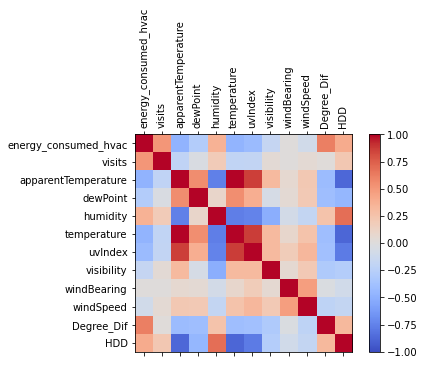

In [25]:
#corr plot
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

From here we can see that the variables: dewPoint, visibility, windBearing, windSpeed are not correlated at all with energy consumption (both sensors), so we proceed to delete these variables. Also, we delete apparentTemperature because is highly correlated with temperature, we only leave one to avoid multicolinearity

In [26]:
df = df.drop(columns = ["dewPoint","visibility", "windBearing", "windSpeed","apparentTemperature"])
df.head()

,energy_consumed_hvac,visits,humidity,temperature,uvIndex,Degree_Dif,HDD
2018-10-08,4.118730e+06,336.0,0.529583,13.455000,0.913043,4.545000,1
2018-10-09,2.512016e+06,336.0,0.628750,13.189583,1.000000,4.810417,1
2018-10-10,2.763989e+06,238.0,0.858696,14.391304,0.700000,3.608696,1
2018-10-11,1.591886e+06,328.0,0.878696,16.296087,0.956522,1.703913,1
2018-10-12,1.442043e+06,19.0,0.860833,18.145417,0.909091,0.145417,0


### 2. Multilinear Regression:
We will analize with p-values the most relevant variables

In [27]:
#define X,y to start modeling
X = df.drop(columns = ["energy_consumed_hvac"])
#we set our set of y which represents our independt variable for the model
y_ac = df['energy_consumed_hvac']

In [28]:
#Divide into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_ac_train, y_ac_test = train_test_split(X, y_ac, test_size=0.25, random_state=0)

In [29]:
#from sklearn import datasets
from regressors import stats
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X, y_ac)
xlabels = X_train.columns
stats.summary(ols, X, y_ac, xlabels)

Residuals:
          Min            1Q       Median            3Q           Max
-1.475832e+07 -3.476044e+06 -877967.4846  3.321235e+06  1.729336e+07


Coefficients:
                 Estimate    Std. Error  t value   p value
_intercept  -2.924221e+05  2.439720e+06  -0.1199  0.904661
visits       4.114012e+04  1.742223e+03  23.6136  0.000000
humidity     1.884844e+06  1.900901e+06   0.9916  0.322074
temperature -2.614622e+05  2.963495e+04  -8.8228  0.000000
uvIndex      6.028894e+05  6.433973e+05   0.9370  0.349359
Degree_Dif   1.247437e+06  5.408731e+04  23.0634  0.000000
HDD         -1.323371e+06  1.024352e+06  -1.2919  0.197208
---
R-squared:  0.66310,    Adjusted R-squared:  0.65746
F-statistic: 117.44 on 6 features


We observe the p-values to understand the significance of the variables. Here, the variables with higher significance are visits, temperature and Degree_Dif due to p-value is below 0,05.

### 3. Embedded Method:

In [30]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y_ac)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y_ac))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 750259.880757
Best score using built-in LassoCV: 0.660443


In [31]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

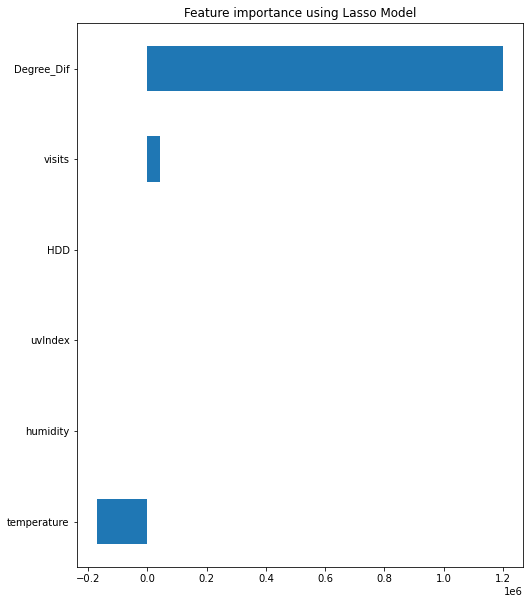

In [33]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Clearly with this method we can observe the most relevant variables which are: Degree_Dif, Temperature, and Visits (same as in the Multiple Regression)